variance =  0.24489891986758897
expectation =  0.5714218463245738


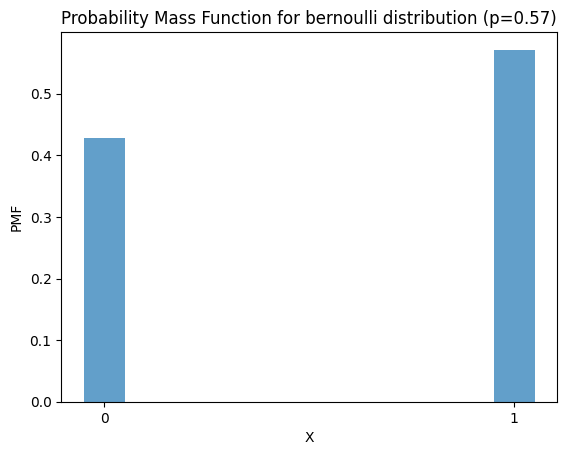

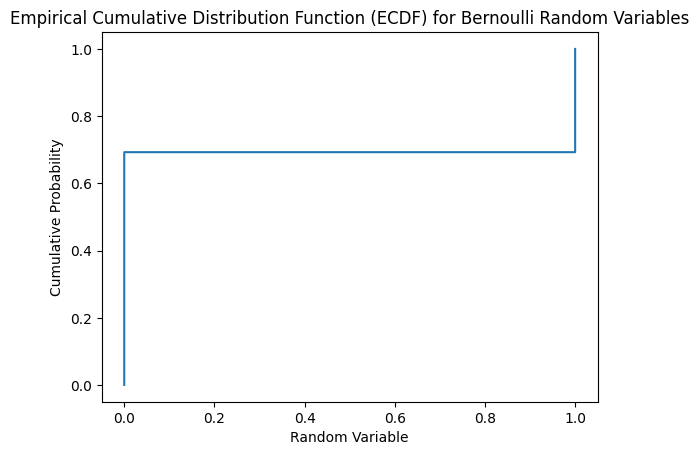

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def bernoulli_pmf(k, p):
    return p**k * (1-p)**(1-k)
    
def bernoulli_cdf(x, p):
    if x < 0:
        return 0
    elif 0 <= x < 1:
        return 1 - p
    else:
        return 1
        
def bernoulli_ecdf(data):
    # Count the number of data points
    n = len(data)
    
    # Sort the data
    sorted_data = sorted(data)
    
    # Calculate the ECDF values
    cumulative_probabilities = []
    count = 0

    for value in sorted_data:
        count += 1
        cumulative_probabilities.append(count / n)

    return sorted_data, cumulative_probabilities

def bernoulli_variance(p):
    return p * (1-p)

def bernoulli_expectation(p):
    return p

p = np.random.rand()
size = 10000
X = stats.bernoulli.rvs(p, size=size)

unique_values, counts = np.unique(X, return_counts=True)
pmf_values = [bernoulli_pmf(k, p) for k in unique_values]

sorted_data, y_ecdf = ecdf(bernoulli_variables)
variance = bernoulli_variance(p)
expectation = bernoulli_expectation(p)

print ("variance = ", variance)
print ("expectation = ", expectation)

plt.bar(unique_values, pmf_values, align='center', alpha=0.7, width=0.1)
plt.xticks(unique_values)
plt.xlabel('X')
plt.ylabel('PMF')
plt.title(f'Probability Mass Function for bernoulli distribution (p={p:.2f})')
plt.show()

plt.step(sorted_data, y_ecdf, where='post')
plt.title('Empirical Cumulative Distribution Function (ECDF) for Bernoulli Random Variables')
plt.xlabel('Random Variable')
plt.ylabel('Cumulative Probability')
plt.show()